## Instalaciones

In [1]:
# !pip install sdv
# !pip install copulas
# !pip install seaborn
# !pip install pandas
# !pip install seaborn
# !pip install pycaret

## Previo

In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))

In [2]:
os.path.abspath("..") in sys.path

True

In [4]:
from funciones import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.regression import *
from copulas.visualization import compare_3d
from sdv.metadata import SingleTableMetadata
from sdv.single_table import GaussianCopulaSynthesizer, CTGANSynthesizer, TVAESynthesizer, CopulaGANSynthesizer
from sdv.evaluation.single_table import run_diagnostic, evaluate_quality, get_column_plot
pd.set_option('display.max_columns', None)
# matplotlib.rcParams["font.family"] = "DejaVu Sans"

## Primer Análisis

In [71]:
DataPrincipal = pd.read_csv("../data/ParkinsonData.csv")

In [72]:
DataPrincipal

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [73]:
DataPrincipal.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [74]:
DataPrincipal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [75]:
DataPrincipal.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


<Figure size 800x500 with 0 Axes>

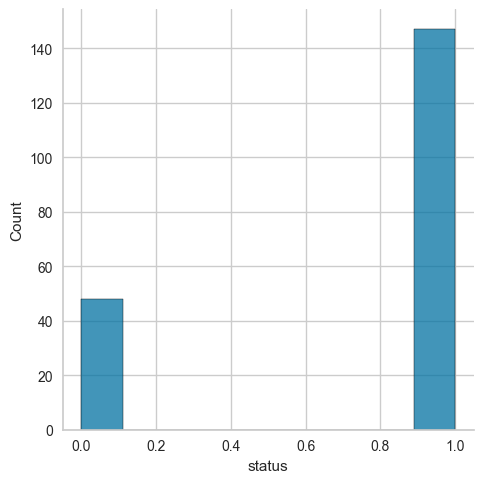

In [76]:
plt.figure(figsize = (8,5))
sns.displot(x = DataPrincipal["status"], kde = False)

In [77]:
print("Número de pacientes con Parkinson:", DataPrincipal[DataPrincipal["status"] == 1]["status"].count())
print("Número de pacientes sin Parkinson:", DataPrincipal[DataPrincipal["status"] == 0]["status"].count())

Número de pacientes con Parkinson: 147
Número de pacientes sin Parkinson: 48


Como vemos, tenemos una notable diferencia entre el número de pacientes con Parkinson y los que no, hay varias maneras de solucionar esto pero yo he elegido crear datos sintéticos a partir de los datos de sujetos sin Parkinson hasta que llegue al número de sujetos con Parkinson.

**Vamos a eliminar unos registros aleatorios de sujetos enfermos hasta dejarlos en 120 para que el número de datos sintéticos de sujetos sanos no supere el 61%.**

## Tratamiento de datos

In [80]:
DataPrincipal

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [81]:
print(len(DataPrincipal[DataPrincipal["status"] == 1]) - 120)

27


In [82]:
for i in range(27):
  DataPrincipal.drop(index = np.random.choice(DataPrincipal[DataPrincipal["status"] == 1].index), inplace = True)
DataPrincipal.reset_index(drop = True, inplace = True)

In [83]:
print("Número de pacientes con Parkinson:", DataPrincipal[DataPrincipal["status"] == 1]["status"].count())
print("Número de pacientes sin Parkinson:", DataPrincipal[DataPrincipal["status"] == 0]["status"].count())

Número de pacientes con Parkinson: 120
Número de pacientes sin Parkinson: 48


**Ahora debemos generar los datos sintéticos.**

Cómo queremos datos sintéticos solo de los pacientes sanos, pero también queremos que los campos parámetros sean distintos entre los pacientes sanos y enfermos debemos crear datos sintéticos de todos los registros tanto sanos como enfermos y luego solo seleccionar los pacientes enfermos. El campo name se va a quedar para ahorrarnos el trabajo de crear nuevos valores inventados para este campo y poder seguir identificando cada uno de los registros.

## Primeros Modelos

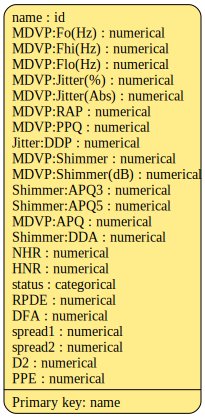

In [16]:
Metadata = SingleTableMetadata()
Metadata.detect_from_dataframe(DataPrincipal)
Metadata.visualize()

>Como vemos el campo name es de tipo id por lo que no se va a comprobar la relación que tiene con los otros campos para crear los datos sintéticos ya que es solo un identificador.

In [17]:
Metadata.validate_data(data=DataPrincipal)

### CTGAN Synthesizer

In [18]:
# synthesizer = CTGANSynthesizer(Metadata, verbose = True)
# synthesizer.fit(DataPrincipal)

Gen. (-2.89) | Discrim. (0.22): 100%|██████████| 300/300 [00:47<00:00,  6.27it/s] 


In [19]:
# Guardar(synthesizer, "CTGANSynthesizer")
synthesizer = Abrir("CTGANSynthesizer")

In [22]:
120 - 48

72

Crearemos más del doble de datos sintéticos de los que necesitamos porque solo necesitaremos los datos sintéticos de pacientes sanos.

In [23]:
DataSintetico = synthesizer.sample(num_rows=150)
DataSintetico.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,sdv-id-zuxDPN,88.333,211.279,65.476,0.00442,0.000007,0.00144,0.00092,0.00783,0.02786,0.150,0.00468,0.01284,0.00719,0.01403,0.00065,15.662,0,0.483814,0.767960,-5.822502,0.326695,2.131324,0.155611
1,sdv-id-DnvTVt,168.824,351.971,101.177,0.01243,0.000007,0.00068,0.00139,0.00264,0.07966,0.085,0.00468,0.01106,0.01575,0.02882,0.00065,22.346,1,0.267152,0.681699,-7.964984,0.166208,2.155875,0.469015
2,sdv-id-MYuvdB,171.784,144.344,65.476,0.00168,0.000007,0.00068,0.00092,0.00204,0.03137,0.085,0.01917,0.01542,0.01181,0.03783,0.00065,17.479,1,0.360205,0.621986,-7.277859,0.211348,2.145400,0.348526
3,sdv-id-bREQUx,110.978,248.322,65.476,0.00425,0.000007,0.01893,0.00092,0.00204,0.02990,0.607,0.01593,0.03982,0.02363,0.01403,0.00065,17.981,1,0.560700,0.600643,-7.571555,0.205178,2.401933,0.306451
4,sdv-id-epIuZf,103.548,108.254,66.616,0.00747,0.000007,0.00187,0.00092,0.00607,0.01427,0.190,0.04930,0.02117,0.02569,0.01403,0.02284,23.944,0,0.639650,0.744888,-5.564502,0.184783,2.519562,0.107431


In [24]:
Diagnostico = run_diagnostic(
    real_data=DataPrincipal,
    synthetic_data=DataSintetico,
    metadata=Metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 24/24 [00:00<00:00, 1679.79it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 332.25it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



**Nuestros datos sintéticos siguen el mismo formato que los orignales**

In [25]:
Calidad = evaluate_quality(
    DataPrincipal,
    DataSintetico,
    Metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 24/24 [00:00<00:00, 1678.76it/s]|
Column Shapes Score: 68.5%

(2/2) Evaluating Column Pair Trends: |██████████| 276/276 [00:01<00:00, 231.62it/s]|
Column Pair Trends Score: 73.97%

Overall Score (Average): 71.23%



**Nuestros datos sintéticos tienen una similaridad del 69.43% con respecto a nuestros datos originales.**

In [26]:
Calidad.get_details('Column Shapes')

,Column,Metric,Score
0,MDVP:Fo(Hz),KSComplement,0.464762
1,MDVP:Fhi(Hz),KSComplement,0.823095
2,MDVP:Flo(Hz),KSComplement,0.652381
3,MDVP:Jitter(%),KSComplement,0.625238
4,MDVP:Jitter(Abs),KSComplement,0.179286
5,MDVP:RAP,KSComplement,0.518571
6,MDVP:PPQ,KSComplement,0.487619
7,Jitter:DDP,KSComplement,0.620952
8,MDVP:Shimmer,KSComplement,0.696190
9,MDVP:Shimmer(dB),KSComplement,0.822619


In [27]:
Calidad.get_details('Column Pair Trends')

,Column 1,Column 2,Metric,Score,Real Correlation,Synthetic Correlation
0,MDVP:Fo(Hz),MDVP:Fhi(Hz),CorrelationSimilarity,0.827500,0.380505,0.035506
1,MDVP:Fo(Hz),MDVP:Flo(Hz),CorrelationSimilarity,0.767883,0.601130,0.136897
2,MDVP:Fo(Hz),MDVP:Jitter(%),CorrelationSimilarity,0.870758,-0.154123,0.104361
3,MDVP:Fo(Hz),MDVP:Jitter(Abs),CorrelationSimilarity,0.843059,-0.402371,-0.088489
4,MDVP:Fo(Hz),MDVP:RAP,CorrelationSimilarity,0.881943,-0.109350,0.126764
...,...,...,...,...,...,...
248,spread1,D2,CorrelationSimilarity,0.715863,0.498084,-0.070190
249,spread1,PPE,CorrelationSimilarity,0.532078,0.970281,0.034437
250,spread2,D2,CorrelationSimilarity,0.703303,0.500367,-0.093028
251,spread2,PPE,CorrelationSimilarity,0.741168,0.637575,0.119910


<Axes: xlabel='Score', ylabel='Count'>

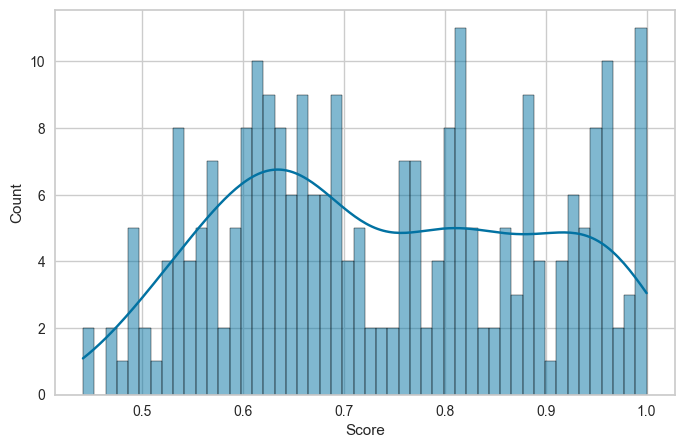

In [28]:
plt.figure(figsize = (8,5))
sns.histplot(x = Calidad.get_details('Column Pair Trends')["Score"], kde = True, bins = 50)

>Podemos observar que hay muchas puntuaciones que son menores de 0.5 y muchas entre 0.6 y 0.8. Muchas columnas no son muy parecidas a las reales.

**Ahora vamos a ver cuanto se parecen las gráficas de densidad de los datos sintéticos y los reales.**

In [29]:
get_column_plot(
    real_data=DataPrincipal,
    synthetic_data=DataSintetico,
    column_name=DataPrincipal.columns[10],
    metadata=Metadata
).show("vscode")

>Muchas veces la gráfica de densidad de los datos sintéticos no está completa debido a que no ha generado datos para un dato concreto de números, si aumentáramos las muestras sintéticas a crear esto no pasaría.
>
>Vemos que las gráficas de densidad de los datos sintéticos se pueden acercar a las de los datos reales, pero hay muchos campos en el que las gráficas de densidad no tienen nada que ver.

In [30]:
synthesizer.get_loss_values_plot().show("vscode")

>Por lo que se ve el modelo no ha tenido suficiente tiempo como para aprender adecuadamente ya que la función de coste del generador no tiende a 0.

**Ahora vamos a comparar los datos sintéticos con los datos reales teniendo en cuenta las relaciones entre 3 campos consecutivos.**

In [31]:
PosCampoInicial = 1
compare_3d(DataPrincipal.iloc[:,PosCampoInicial:PosCampoInicial+3], DataSintetico.iloc[:,PosCampoInicial:PosCampoInicial+3]).show("vscode")

### Gaussian Copula Synthesizer

In [32]:
# synthesizer = GaussianCopulaSynthesizer(Metadata)
# synthesizer.fit(DataPrincipal)

In [33]:
# Guardar(synthesizer, "GaussianCopulaSynthesizer")
synthesizer = Abrir("GaussianCopulaSynthesizer")

In [42]:
DataSintetico = synthesizer.sample(num_rows=150)
Diagnostico = run_diagnostic(
    real_data=DataPrincipal,
    synthetic_data=DataSintetico,
    metadata=Metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 24/24 [00:00<00:00, 2356.74it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 496.13it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [43]:
Calidad = evaluate_quality(
    DataPrincipal,
    DataSintetico,
    Metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 24/24 [00:00<00:00, 2634.89it/s]|
Column Shapes Score: 87.41%

(2/2) Evaluating Column Pair Trends: |██████████| 276/276 [00:01<00:00, 252.95it/s]|
Column Pair Trends Score: 94.52%

Overall Score (Average): 90.96%



In [44]:
get_column_plot(
    real_data=DataPrincipal,
    synthetic_data=DataSintetico,
    column_name=DataPrincipal.columns[10],
    metadata=Metadata
).show("vscode")

In [45]:
PosCampoInicial = 1
compare_3d(DataPrincipal.iloc[:,PosCampoInicial:PosCampoInicial+3], DataSintetico.iloc[:,PosCampoInicial:PosCampoInicial+3]).show("vscode")

### TVAE Synthesizer

In [46]:
# synthesizer = TVAESynthesizer(Metadata, verbose = True)
# synthesizer.fit(DataPrincipal)

Loss: -32.441: 100%|██████████| 300/300 [00:14<00:00, 21.05it/s]


In [47]:
# Guardar(synthesizer, "TVAESynthesizer")
synthesizer = Abrir("TVAESynthesizer")

In [49]:
DataSintetico = synthesizer.sample(num_rows=150)
Diagnostico = run_diagnostic(
    real_data=DataPrincipal,
    synthetic_data=DataSintetico,
    metadata=Metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 24/24 [00:00<00:00, 1580.94it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 333.38it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [50]:
Calidad = evaluate_quality(
    DataPrincipal,
    DataSintetico,
    Metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 24/24 [00:00<00:00, 2340.19it/s]|
Column Shapes Score: 80.46%

(2/2) Evaluating Column Pair Trends: |██████████| 276/276 [00:01<00:00, 212.12it/s]|
Column Pair Trends Score: 81.37%

Overall Score (Average): 80.91%



In [51]:
get_column_plot(
    real_data=DataPrincipal,
    synthetic_data=DataSintetico,
    column_name=DataPrincipal.columns[10],
    metadata=Metadata
).show("vscode")

In [52]:
PosCampoInicial = 1
compare_3d(DataPrincipal.iloc[:,PosCampoInicial:PosCampoInicial+3], DataSintetico.iloc[:,PosCampoInicial:PosCampoInicial+3]).show("vscode")

### Copula GAN Synthesizer

In [53]:
# synthesizer = CopulaGANSynthesizer(Metadata, verbose = True)
# synthesizer.fit(DataPrincipal)

Gen. (-2.50) | Discrim. (0.13): 100%|██████████| 300/300 [00:50<00:00,  5.94it/s] 


In [54]:
# Guardar(synthesizer, "CopulaGANSynthesizer")
synthesizer = Abrir("CopulaGANSynthesizer")

In [55]:
DataSintetico = synthesizer.sample(num_rows=150)
Diagnostico = run_diagnostic(
    real_data=DataPrincipal,
    synthetic_data=DataSintetico,
    metadata=Metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 24/24 [00:00<00:00, 2395.38it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 493.51it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [56]:
Calidad = evaluate_quality(
    DataPrincipal,
    DataSintetico,
    Metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 24/24 [00:00<00:00, 2142.87it/s]|
Column Shapes Score: 66.23%

(2/2) Evaluating Column Pair Trends: |██████████| 276/276 [00:01<00:00, 258.30it/s]|
Column Pair Trends Score: 73.29%

Overall Score (Average): 69.76%



In [57]:
get_column_plot(
    real_data=DataPrincipal,
    synthetic_data=DataSintetico,
    column_name=DataPrincipal.columns[10],
    metadata=Metadata
).show("vscode")

In [58]:
synthesizer.get_loss_values_plot().show("vscode")

In [59]:
PosCampoInicial = 1
compare_3d(DataPrincipal.iloc[:,PosCampoInicial:PosCampoInicial+3], DataSintetico.iloc[:,PosCampoInicial:PosCampoInicial+3]).show("vscode")

>Hemos visto que el modelo que puede funcionar mejor para nuestros datos es GaussianCopulaSynthesizer así que vamos a ver cuánto puede mejorar.

>Podemos ver que aunque en algunos campos los datos reales y sintéticos mantienen las relaciones entre los otros campos, en otros es completamente distinto y mejorable.
<!-- 
**Lo que vamos a hacer va a ser una hiperparametricación sobre el algoritmo para crear datos sintéticos para ver qué valores son los óptimos para conseguir unos datos sintéticos más fiables y cercanos a los reales. Vamos a comenzar por aumentar las épocas de entrenamiento del modelo ya al aumentarlo nunca va a empeorar el modelo pero veremos que llega un punto en el que la mejora no es algo significativo así que intentaremos encontrar el parámetro que tenga mejor relación calidad-tiempo**

**El objeto synthesizer tiene por defecto asignadas 300 épocas que va a realizar asi que los valores que probemos van a ser mayores que 300** -->


### MejorModelo

In [60]:
len(DataPrincipal[DataPrincipal["status"] == 1])-len(DataPrincipal[DataPrincipal["status"] == 0])

72

In [61]:
# synthesizer = GaussianCopulaSynthesizer(Metadata)
# synthesizer.fit(DataPrincipal)

In [62]:
# Guardar(synthesizer, "MejorModelo")
synthesizer = Abrir("MejorModelo")

In [63]:
DataSintetico = synthesizer.sample(num_rows=400)
Diagnostico = run_diagnostic(
    real_data=DataPrincipal,
    synthetic_data=DataSintetico,
    metadata=Metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 24/24 [00:00<00:00, 2958.25it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 498.37it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [64]:
Calidad = evaluate_quality(
    DataPrincipal,
    DataSintetico,
    Metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 24/24 [00:00<00:00, 2355.08it/s]|
Column Shapes Score: 88.37%

(2/2) Evaluating Column Pair Trends: |██████████| 276/276 [00:01<00:00, 247.58it/s]|
Column Pair Trends Score: 95.31%

Overall Score (Average): 91.84%



In [65]:
get_column_plot(
    real_data=DataPrincipal,
    synthetic_data=DataSintetico,
    column_name=DataPrincipal.columns[10],
    metadata=Metadata
).show("vscode")

In [66]:
PosCampoInicial = 1
compare_3d(DataPrincipal.iloc[:,PosCampoInicial:PosCampoInicial+3], DataSintetico.iloc[:,PosCampoInicial:PosCampoInicial+3]).show("vscode")

## Hiperparametricación de las épocas

In [131]:
# MejorNEpocas = []
# Epocas = [x for x in range(500,7000,250)]
# Iteracion = 1
# try:
#   for i in Epocas:
#     Inicio = monotonic()
#     Synthesizer = GaussianCopulaSynthesizer(Metadata, epochs = i)
#     print("Entrenando modelo / ", end = "")
#     Synthesizer.fit(DataPrincipal)
#     Final = monotonic()
#     DataSintetico = Synthesizer.sample(num_rows=150)
#     Diagnostico = run_diagnostic(
#       DataPrincipal,
#       DataSintetico,
#       Metadata,
#       False
#     )
#     if Diagnostico.get_score() !=1: #Si los datos tienen algún fallo queremos que siga con la siguiente iteración.
#       continue
#     Calidad = evaluate_quality(
#       DataPrincipal,
#       DataSintetico,
#       Metadata,
#       False
#     )
#     print("Iteración nº" + str(Iteracion) + "=", "Tiempo:", str(Final - Inicio) + ",", "Puntuación:", Calidad.get_score())
#     MejorNEpocas.append([Synthesizer, Final - Inicio, Calidad.get_score()])
#     Iteracion += 1
# except:
#   print("Ha fallado en el intento nº" + str(Iteracion))
#   Guardar(MejorNEpocas, "MejorNEpocas") #Si ocurre algún fallo queremos que guarde la lista igualmente.
    

Ha fallado en el intento nº1


**Guardamos la variable por si ocurre un error en tiempo de ejecución más adelante, no tener que volver a ejecutar el bucle anterior. Para ello vamos a crear una función para hacerlo de una manera más cómoda.**

In [30]:
# Guardar(MejorNEpocas, "MejorNEpocas")

In [31]:
# MejorNEpocas = Abrir("MejorNEpocas")

In [32]:
# list(map(lambda x: x[0].epochs, sorted(MejorNEpocas, key = lambda x: x[-1])))

[500,
 750,
 1000,
 2000,
 1750,
 1250,
 1500,
 2250,
 2500,
 3000,
 2750,
 3500,
 6750,
 3250,
 4000,
 4750,
 5750,
 4250,
 6000,
 6500,
 4500,
 5500,
 5000,
 5250,
 6250,
 3750]

Vemos que por lo general cuantas más épocas mejor puntuación tiene el modelo hasta cierto punto

In [33]:
# list(map(lambda x: x[-1], sorted(MejorNEpocas, key = lambda x: x[-1])))

[0.7241666230285242,
 0.7434367954630643,
 0.7649656319810981,
 0.7688636186299542,
 0.7827568851123243,
 0.7990660926675324,
 0.8022374673646557,
 0.8117855538028134,
 0.8286816423355651,
 0.8365389545139176,
 0.8406069389593196,
 0.8479432836530773,
 0.8540522903533978,
 0.8546266628414418,
 0.8555463673407812,
 0.8577372498408729,
 0.8590352571229457,
 0.8597023028321551,
 0.8606314689545143,
 0.8608399274140842,
 0.860850997570169,
 0.8638212271970491,
 0.8649291536347292,
 0.870889187836347,
 0.8748813873617582,
 0.8800949204195001]

In [34]:
# ListaEpocas = pd.DataFrame(list(map(lambda x: x[-1], sorted(MejorNEpocas, key = lambda x: x[-1]))),
#              index = list(map(lambda x: x[0].epochs, sorted(MejorNEpocas, key = lambda x: x[-1]))),
#              columns = ["Puntuación"])

<Axes: >

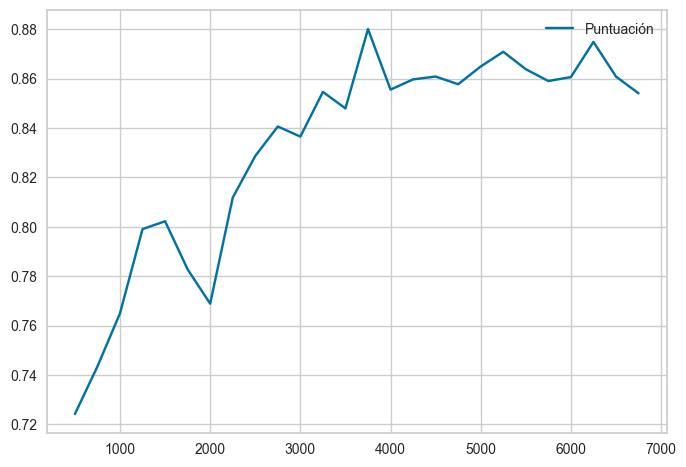

In [35]:
# sns.lineplot(ListaEpocas)

>Vemos que a partir de las 4000 épocas ya no mejora la puntuación así que ya sabemos alrededor de cuántas épocas puede necesitar el modelo para entrenar.

In [36]:
# sorted(MejorNEpocas, key = lambda x: x[-1], reverse = True)[0][0].get_loss_values_plot().show("vscode")

## Modificación de los datos principales con los datos sintéticos

In [84]:
len(DataSintetico[DataSintetico["status"] == 0])

111

<!-- **Vamos a ver la mejora que han tenido estos datos.** -->

In [85]:
len(DataPrincipal[DataPrincipal["status"] == 1])-len(DataPrincipal[DataPrincipal["status"] == 0])

72

In [86]:
DataDef = pd.concat([DataPrincipal, DataSintetico[DataSintetico["status"] == 0].sample(72)], axis = 0)

In [87]:
DataDef.reset_index(drop = True, inplace = True)

In [88]:
print("Número de pacientes con Parkinson:", DataDef[DataDef["status"] == 1]["status"].count())
print("Número de pacientes sin Parkinson:", DataDef[DataDef["status"] == 0]["status"].count())

Número de pacientes con Parkinson: 120
Número de pacientes sin Parkinson: 120


<Figure size 800x500 with 0 Axes>

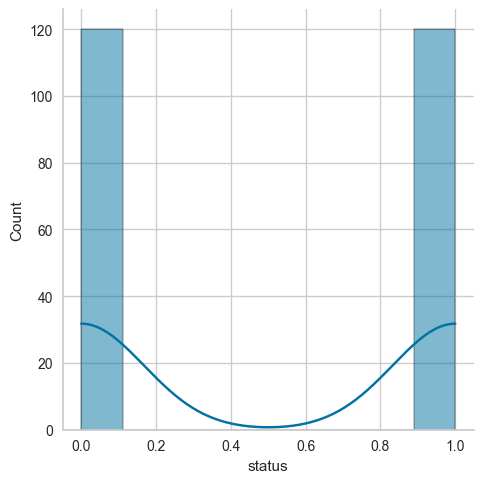

In [90]:
plt.figure(figsize = (8,5))
sns.displot(x = DataDef["status"], kde = True)

In [138]:
# PosCampoInicial = 1
# compare_3d(DataPrincipal.iloc[:,PosCampoInicial:PosCampoInicial+3], sorted(MejorNEpocas, key = lambda x: x[-1], reverse = True)[0][0].sample(num_rows=150).iloc[:,PosCampoInicial:PosCampoInicial+3]).show("vscode")

<!-- **Parece que los datos se van acercando más a lo que necesitamos, pero todavía es mejorable.** -->

<!-- Los parámetros con los que vamos a realizar la hiperparametrización son:
* Epocas
* batch_size
* discriminator_decay
* discriminator_lr
* discriminator_steps
* embedding_dim
* generator_decay
* generator_lr
* pac

**Vamos usar una función propia de hiperparametrización aleatoria que hace un número mínimo de iteraciones.** -->

In [45]:
# MejoresParametros = Abrir("MejoresParametros")

In [43]:
# ArquitecturasRN = ((32,64,128,256,256,128,64,32),
#                    (64,128,256,256,128,64),
#                    (256,256,128,64,32),
#                    (128,128,32),
#                    (32,128,512,128,32),
#                    (32,64,32),
#                    (256,512,256),
#                    (256,512,256,32))

In [ ]:
# Params = Hiper(Principal = DataPrincipal,
#                Meta = Metadata,
#                RangoEpocas = range(2000, 6001, 250),
#                RangoBatchSize = range(42, 169, 42),
#                RangoDiscriminatorDim = ArquitecturasRN,
#                RangoDiscriminatorDecay = (1e-3, 1e-4, 1e-5, 1e-6),
#                RangoDiscriminatorLR = (2e-2, 2e-3, 2e-4),
#                RangoDiscriminatorSteps = (1, 2, 3, 4),
#                RangoEmbeddingDim = (64, 128, 256, 512),
#                RangoGeneratorDim = ArquitecturasRN,
#                RangoGeneratorDecay = (1e-3, 1e-4, 1e-5, 1e-6),
#                RangoGeneratorLR = (2e-2, 2e-3, 2e-4),
#                RangoPac = (3,6,7,14,21),
#                EarlyStoppingEspera = 20,
#                EarlyStoppingDisminucion = 0.02,
#                Limite = 3000,
#                Lista = MejoresParametros)

Ya tenemos nuestros datos de una manera en la que podemos realizar un análisis.

## Análisis de los datos

In [92]:
DataDef["name"]

0      phon_R01_S01_1
1      phon_R01_S01_2
2      phon_R01_S01_3
3      phon_R01_S01_4
4      phon_R01_S01_5
            ...      
235     sdv-id-maXFiI
236     sdv-id-kvcFKs
237     sdv-id-ywSLkj
238     sdv-id-pUJjfd
239     sdv-id-apEwde
Name: name, Length: 240, dtype: object

In [93]:
DataDef[["name", "status"]][:50]

,name,status
0,phon_R01_S01_1,1
1,phon_R01_S01_2,1
2,phon_R01_S01_3,1
3,phon_R01_S01_4,1
4,phon_R01_S01_5,1
5,phon_R01_S02_1,1
6,phon_R01_S02_2,1
7,phon_R01_S02_3,1
8,phon_R01_S02_4,1
9,phon_R01_S02_5,1


> Parece que el número seguido de la S en el campo "name" representa a un sujeto concreto por lo que siempre va a dar el mismo estado(Este campo lo tendrémos que eliminar más tarde para que el modelo no aprenda según el nombre del sujeto).

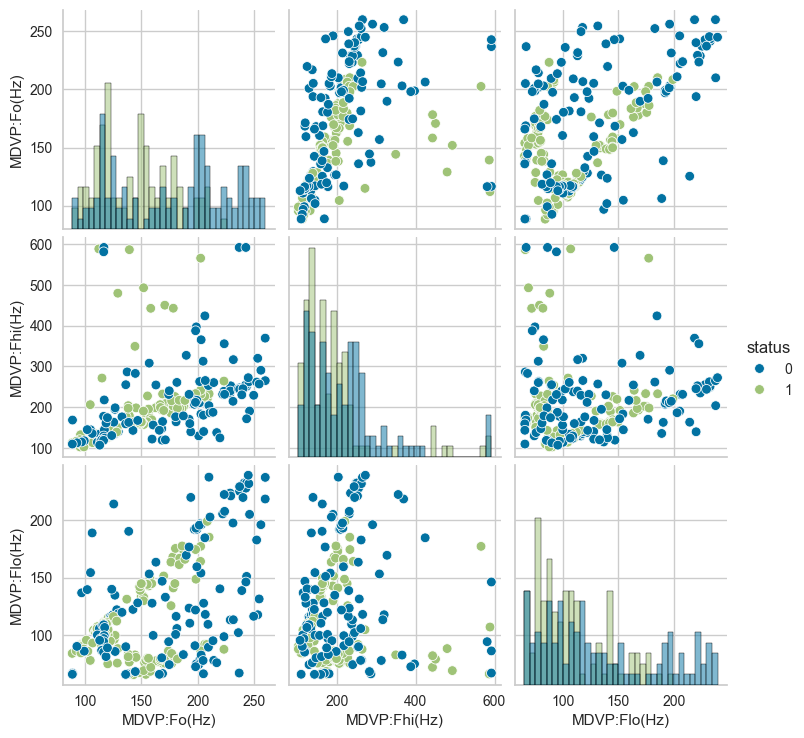

In [120]:
sns.pairplot(pd.concat([DataDef.iloc[:,1:4], DataDef["status"]], axis = 1), hue = "status", diag_kind = "hist", diag_kws = {"bins": 35})

>Las gráficas nos muestran cierta relación entre los 3 campos de la frecuencia fundamental de la voz y el estado del sujeto ya que vemos ciertas zonas en las que hay mucha densidad de representaciones de sujetos con Parkinson y poca de sujetos sanos. También vemos que tienen cierta relación unos con otros de manera lineal. Antes de ver las gráficas de densidad debemos tener en cuenta que hay muchos más sujetos con Parkinson que sin él en estos datos por lo que los máximos serán más grandes en los sujetos con Parkinson.
>
>Si nos fijamos en las gráficas de densidad de Flo(Hz) vemos que los sujetos con Parkinson son propensos a tener una frecuencia mínima fundamental de 100Hz pero esta también es la frecuencia mínima fundamental más común de los sujetos sanos, podemos usar este campo como parámetro para nuestro modelo pero junto a otros ya que no tiene una relación muy fuerte.
>
>Si nos fijamos en las gráficas de densidad de Fhi(hz) vemos que tiene nula relación con el estado ya que ambas tienen los máximos alrededor de 200 por lo que no nos servirá de nada para nuestro modelo.
>
>Pero si miramos las gráficas de densidad de Fo(Hz) observamos que tienen los máximos en diferentes rangos de valores por lo que hay una diferencia clara en la frecuencia fundamental media vocal de los pacientes con Parkinson y sin él por lo que trabajaremos sobre este campo más adelante para poder obtener la mayor información posible de esta relación.

+ Relación entre los campos: Todos con todos(lineal).
+ Relación con la variable objetivo: MDVP:Flo(Hz) / MDVP:Fo(Hz)
  - Relación MDVP:Flo(Hz)-objetivo:
    * Valores diferenciadores entre sujetos sanos y enfermos.
    * Pico de densidad notable.
  - Relación MDVP:Fo(Hz)-objetivo:
    * Valores diferenciadores entre sujetos sanos y enfermos.
    * Pico de densidad notable.
    * Picos de densidad diferenciables.

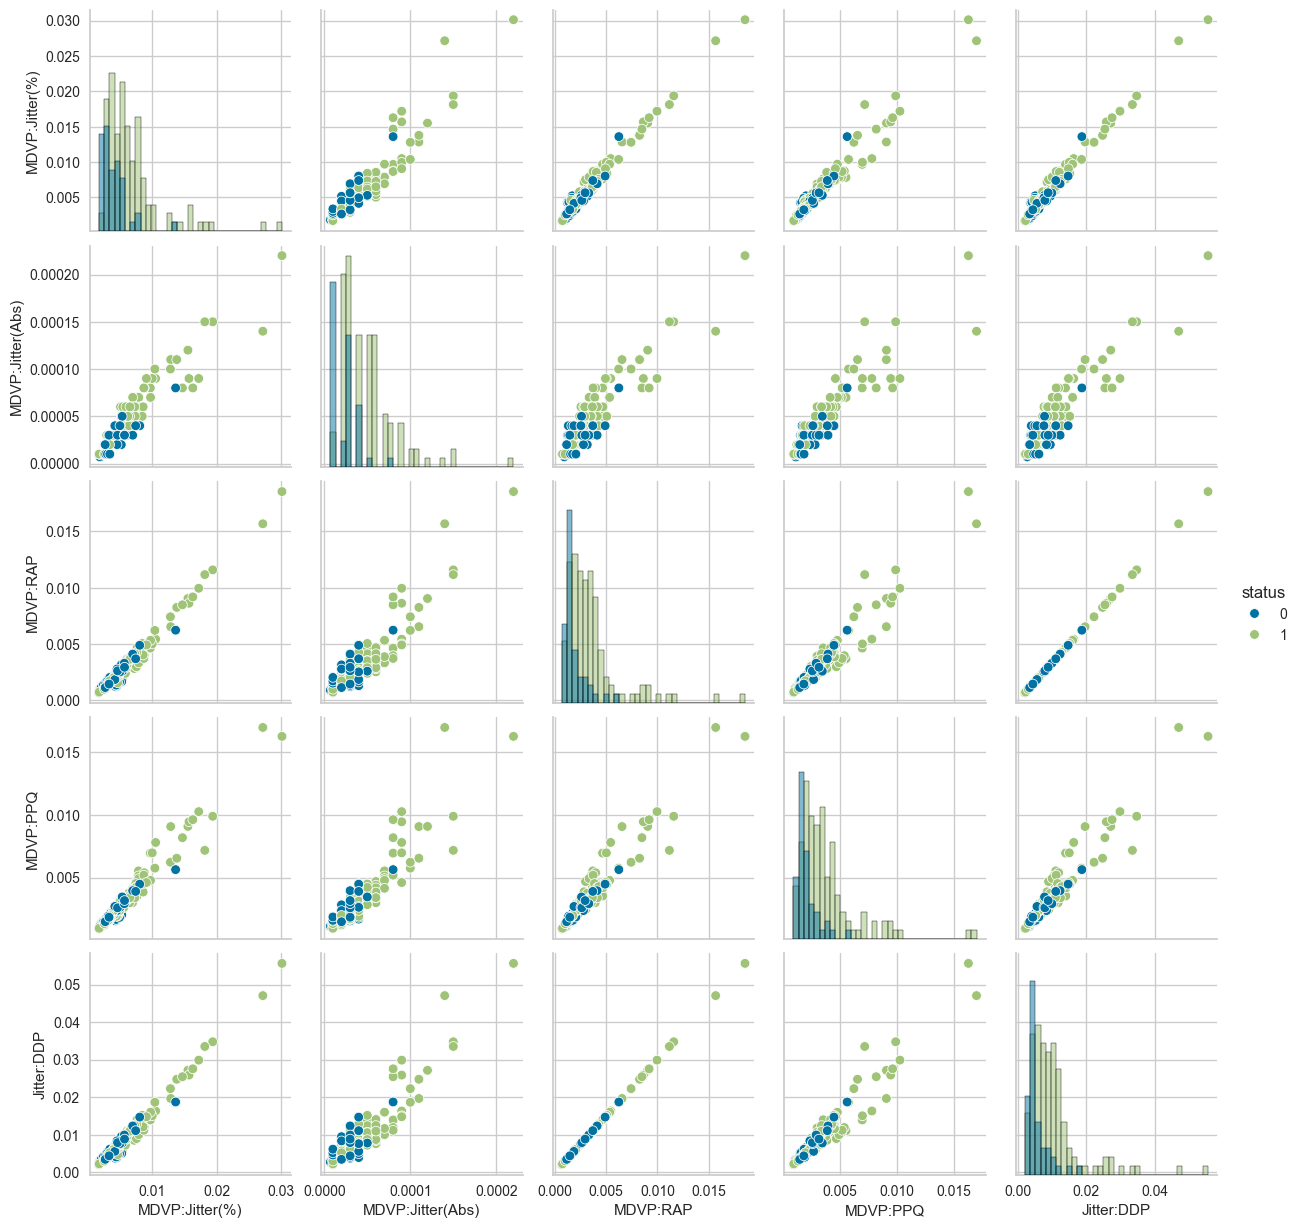

In [121]:
sns.pairplot(pd.concat([DataPrincipal.iloc[:,4:9], DataPrincipal["status"]], axis = 1), hue = "status", diag_kind = "hist", diag_kws = {"bins": 35})

> Podemos observar que los sujetos con parkinson tienen cierta tendencia a acercarse a algunos valores de estos campos, También vemos que las gráficas de densidad ahora no nos muestran diferencias notables en cuando a la altura de los picos ni diferencias en cuanto al valor donde se situan los 2 picos pero sí vemos que los valores atípicos de las gráficas de densidad de los sujetos enfermos es más amplio que el de los sanos. Debemos tener esto en cuenta para predecir también a partir de características no comunes de la enfermedad.
>
>También hay bastante relación entre todos los campos.

+ Relación entre los campos: Todos con todos(lineal).
+ Relación con la variable objetivo: MDVP:Jitter(%) / MDVP:Jitter(Abs) / MDVP:RAP / MDVP:PPQ / Jitter:DDP
  - Relación MDVP:Jitter(%)-objetivo:
    * Valores diferenciadores entre sujetos sanos y enfermos.
    * Valores atípicos de sujetos enfermos diferentes a los sanos.
  - Relación MDVP:Jitter(Abs)-objetivo:
    * Valores diferenciadores entre sujetos sanos y enfermos.
    * Valores atípicos de sujetos enfermos diferentes a los sanos.
  - Relación MDVP:RAP-objetivo:
    * Valores diferenciadores entre sujetos sanos y enfermos.
    * Valores atípicos de sujetos enfermos diferentes a los sanos.
  - Relación MDVP:PPQ-objetivo:
    * Valores diferenciadores entre sujetos sanos y enfermos.
    * Valores atípicos de sujetos enfermos diferentes a los sanos.
  - Relación Jitter:DDP-objetivo:
    * Valores diferenciadores entre sujetos sanos y enfermos.
    * Valores atípicos de sujetos enfermos diferentes a los sanos.

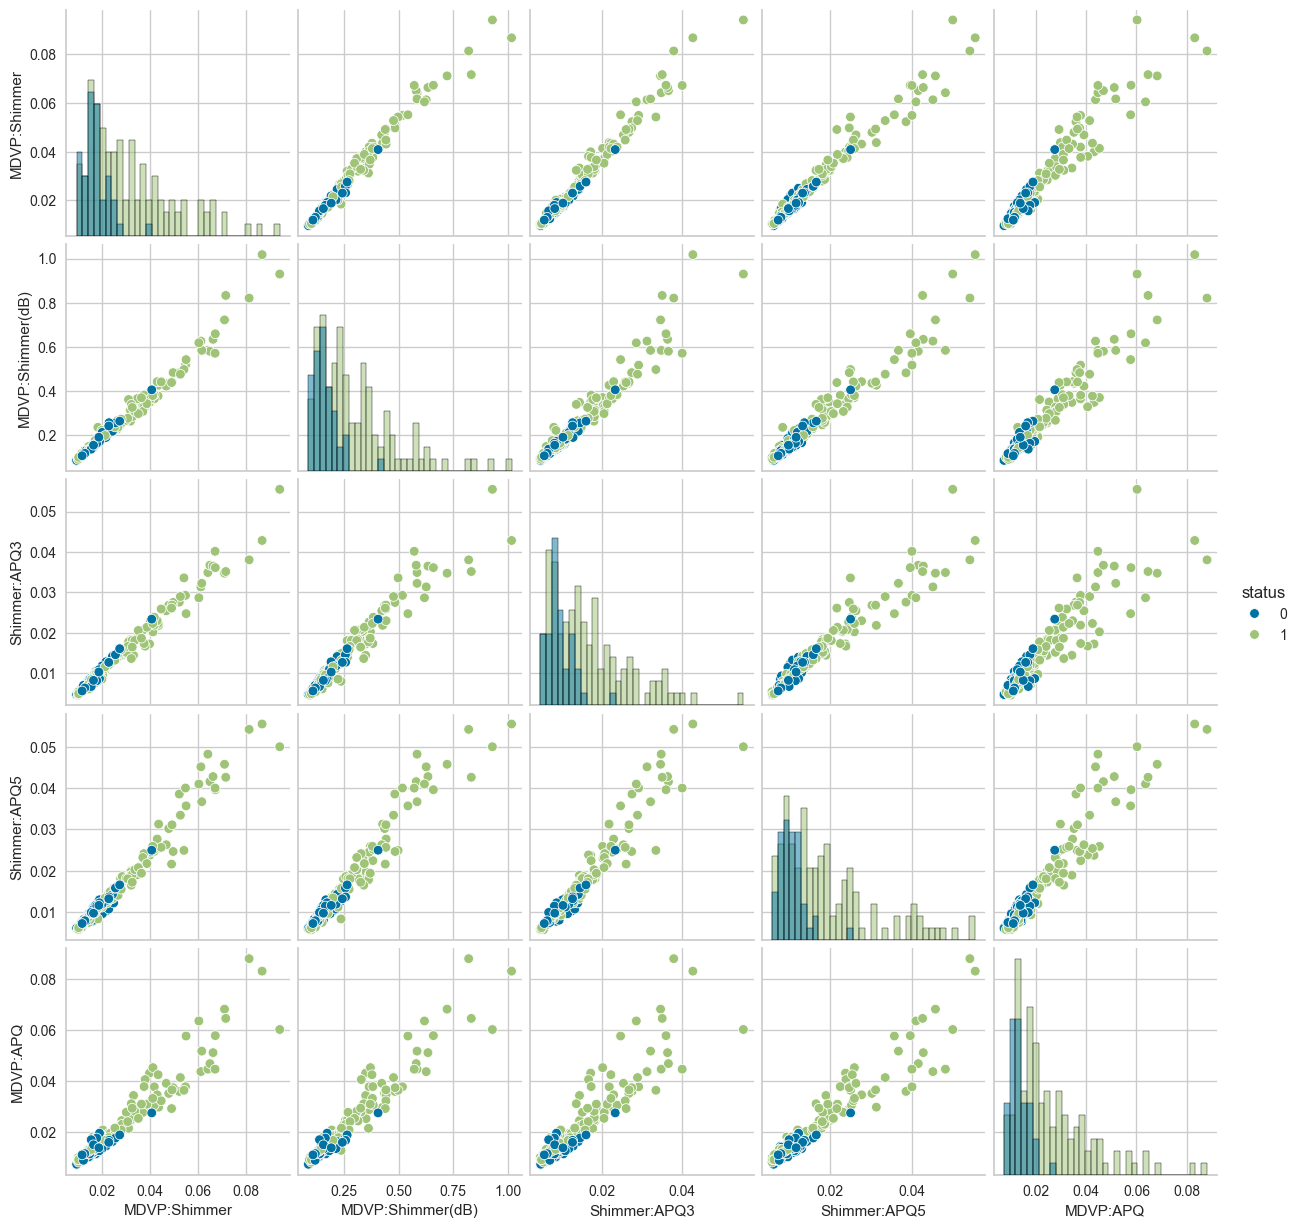

In [122]:
sns.pairplot(pd.concat([DataPrincipal.iloc[:,9:14], DataPrincipal["status"]], axis = 1), hue = "status", diag_kind = "hist", diag_kws = {"bins": 35})

> En estas gráficas ocurre lo mismo, los sujetos con Parkinson tienden mucho a tener ciertos valores, pero son unos valores tan comunes también en sujetos sanos que no se puede tener en cuenta como un parámetro de importancia individualmente, pero los sujetos con Parkinson ocupan por lo general un rango más amplio lo que puede querer decir que algunos de estos sujetos con Parkinson tienen valores poco habituales de estos campos, esto puede ser debido a que hay más sujetos con Parkinson con lo que es más probable encontrarse con alguien que se salga de lo común independientemente de si tiene Parkinson o no, pero también puede ser que a unos pocos les afecte de manera distinta a lo normal, entonces estos campos no servirían individualmente para asegurar que tienen Parkinson. Pero si viéramos valores irregulares en este parámetro junto con otros valores irregulares de otros campos en un sujeto, aunque no sean características comunes del Parkinson son varias características poco comunes en un solo sujeto, lo que nos puede ayudar no solo a predecir personas con la enfermedad cunado tienen características comunes con respecto a la voz sino que nos puede ayudar también a predecir sujetos que tienen la enfermedad y no tienen síntomas comunes los cuales podrían pasar desapercibido debido a que no presentan un solo sintoma habitual pero sí presentan muchos síntomas no habituales.

>También podemos ver que todos los campos están bastante relacionados unos con otros lo que nos lleva a pensar que tal vez es mejor crear un solo campo que tenga información de todos estos.

>Observamos que tienen las mismas características que los campos de las gráficas anteriores pero en el caso de las gráficas de densidad, los valores atípicos están más diferenciados entre las 2 gráficas.

+ Relación entre los campos: Todos con todos(lineal).
+ Relación con la variable objetivo: MDVP:Shimmer / MDVP:Shimmer(dB) / Shimmer:APQ3 / Shimmer:APQ5 / MDVP:APQ
  - Relación MDVP:Shimmer-objetivo:
    * Valores diferenciadores entre sujetos sanos y enfermos.
    * Valores atípicos de sujetos enfermos diferentes a los sanos.
  - Relación MDVP:Shimmer(dB)-objetivo:
    * Valores diferenciadores entre sujetos sanos y enfermos.
    * Valores atípicos de sujetos enfermos diferentes a los sanos.
  - Relación Shimmer:APQ3-objetivo:
    * Valores diferenciadores entre sujetos sanos y enfermos.
    * Valores atípicos de sujetos enfermos diferentes a los sanos.
  - Relación Shimmer:APQ5-objetivo:
    * Valores diferenciadores entre sujetos sanos y enfermos.
    * Valores atípicos de sujetos enfermos diferentes a los sanos.
  - Relación MDVP:APQ:-objetivo:
    * Valores diferenciadores entre sujetos sanos y enfermos.
    * Valores atípicos de sujetos enfermos diferentes a los sanos.

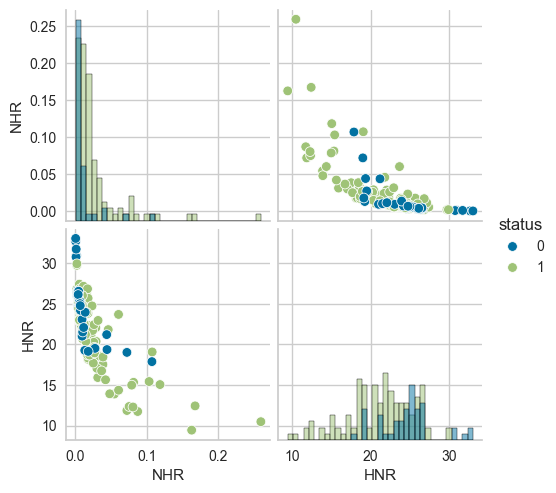

In [123]:
sns.pairplot(pd.concat([DataPrincipal[["NHR", "HNR"]], DataPrincipal["status"]], axis = 1), hue = "status", diag_kind = "hist", diag_kws = {"bins": 35})

>El campo NHR no nos da nada de información ya que los 2 picos son alrededor de los mismos valores, las 2 gráficas tienen más o menos el mismo rango de valores y el mismo valor por el que ronda los picos de ambas gráficas. Pero el campo HNR sí nos puede servir para identificar características poco comunes.
>
>Como observación podemos decir que los campos HNR y NHR tienen una posible relación re proporcionalidad inversa.

+ Relación entre los campos: Todos con todos(inversamente proporcional).
+ Relación con la variable objetivo: HNR
  - Relación HNR-objetivo:
    * Valores diferenciadores entre sujetos sanos y enfermos.
    * Valores atípicos de sujetos enfermos diferentes a los sanos.
    * Pico de densidad diferenciable del objetivo.

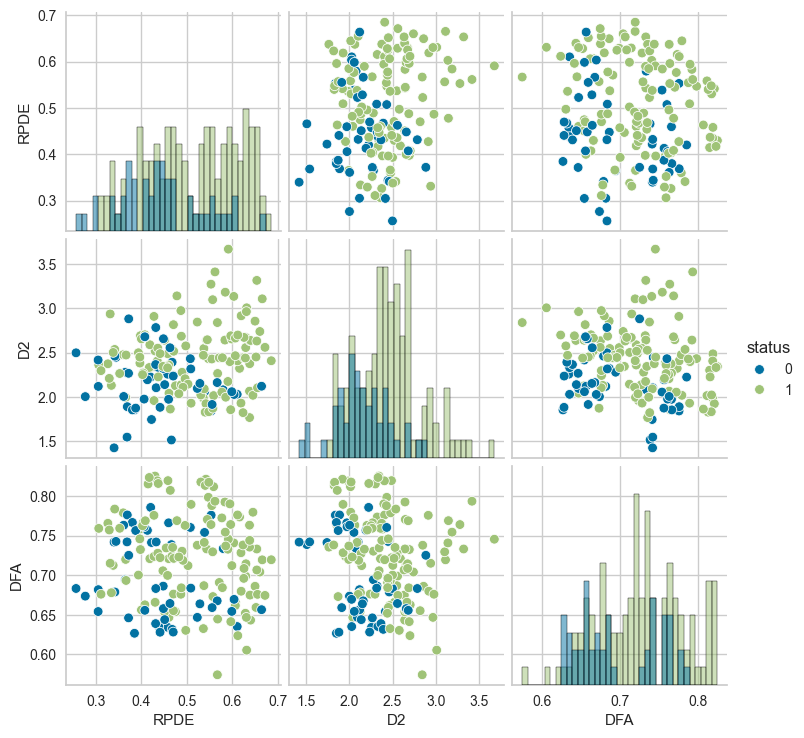

In [124]:
sns.pairplot(pd.concat([DataPrincipal[["RPDE", "D2", "DFA"]], DataPrincipal["status"]], axis = 1), hue = "status", diag_kind = "hist", diag_kws = {"bins": 35})

>El campo RPDE nos puede servir para obtener características comunes de la enfermedad pero no para características no comunes. En cambio los campos D2 y DFA nos puede servir para ambas cosas. Observamos también que no tienen prácticamente ninguna relación ningún campo con el otro.
>
>Si nos fijamos en las gráficas de dispersión que relacionan D2 y RPDE podemos ver que son las únicas que tienen un area en la que hay muchos sujetos con Parkinson y muy pocos sin él, aunque la mayoría del resto de sujetos está muy mezclado, esto nos puede servir para predecir características no comunes de la enfermedad. No podemos decir que estos campos por separado tienen valores diferenciadores entre sujetos sanos y enfermos sino que funcionan como pareja. Estos campos individualmente no nos ayudan a der bien aread diferentes entre sujetos sanos y enfermos como podemos ver en las otras gráficas en las que se relacionan estos campos con DFA.

+ Relación entre los campos: Ninguna.
+ Relación con la variable objetivo: (RPDE_D2) / DFA
  - Relación DFA-objetivo:
    * Valores atípicos de sujetos enfermos diferentes a los sanos.
    * Pico de densidad diferenciable del objetivo.
  - Relación (RPDE_D2)-objetivo:
    * Valores atípicos de sujetos enfermos diferentes a los sanos.

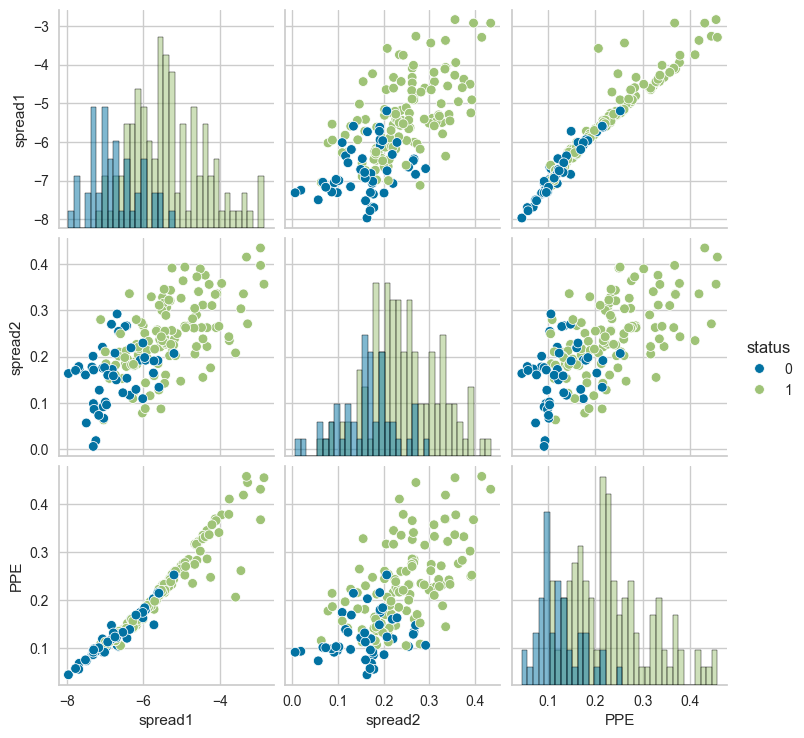

In [125]:
sns.pairplot(pd.concat([DataPrincipal[["spread1","spread2","PPE"]], DataPrincipal["status"]], axis = 1), hue = "status", diag_kind = "hist", diag_kws = {"bins": 35})

>En este caso los campos spread1, spread2 y PPE tienen diferencias ligeras en cuanto a los picos entre los pacientes con Parkinson y los que no. Es algo ligero pero podríamos trabajar en estos datos para obtener otros datos más valiosos. Además, podemos ver que están bastante relacionados entre ellos.
>
>Para finalizar, vemos que los campos spread1 y PPE tienen bastante relación.

**Vamos a guardar los nombres de los campos que pueden no tener información importante de por sí debido a que los valores comunes de los sujetos con y sin Parkinson coinciden pero no los valores poco comunes de los sujetos con Parkinson para realizar feature engineering con estos campos en conjunto.**

**Es decir, vamos a guardar los nombres de los campos que solo nos servirán para que nuestro modelo también pueda predecir los sujetos con muchas características no comunes que pudieran pasar desapercibidos.**

In [ ]:
CarNoComunes = ["MDVP:Fo(Hz)", "MDVP:Fhi(Hz)",
          "MDVP:Jitter(%)", "MDVP:Jitter(Abs)", "MDVP:RAP", "MDVP:PPQ", "Jitter:DDP",
          "MDVP:Shimmer", "MDVP:Shimmer(dB)", "Shimmer:APQ3", "Shimmer:APQ5", "MDVP:APQ", "Shimmer:DDA",
          "HNR", "spread1", "spread2", "PPE"]

**Ahora vamos a guardar los nombres de los campos que nos servirán para que nuestro modelo pueda predecir lso sujetos con Parkinson que tienen características comunes.**

In [ ]:
CarComunes = ["MDVP:Fo(Hz)", "MDVP:Flo(Hz)"]

In [ ]:
DataPrincipal.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')